## K-Means
* 1 - Escolhe K pontos aleatórios como centros de cluster chamados centróides.
* 2 - Atribui cada ponto ao cluster mais próximo calculando sua distância para cada centróide.
* 3 - Encontra o novo centro de cluster, medindo a média dos pontos atribuídos.
* 4 - Repete as etapas 2 e 3 até que nenhuma das atribuições de cluster seja alterada.<br><br>

![alt text](https://i.imgur.com/k4XcapI.gif)
---

* Segmentação de Imagem
* Segmentação de Clientes
* Clustering de Genes
* Cluster de notícias(por assunto)
* Idiomas de cluster
* Agrupamento de espécies
* Detecção de outliers

In [21]:
# CARREGAR LIBS
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.markers 

In [2]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, optional (default=100)
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=None)
        The number of centers to generate, or the fixed center locations.
        If n_samples is an int and centers is None, 3 centers are generated.
        If n_samples is array-like, centers 

In [3]:
# X e Y com 200 amostras
features, clusters = make_blobs(n_samples = 2000, n_features = 10, centers = 5, cluster_std = 0.4, shuffle = True)

In [10]:
# Primeiras 5 amostras e 10 features
print("Feature Matrix: ");
print(pd.DataFrame(features, columns=['Feature 1', 'Feature 2', 'Feature 3',
      'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8',
      'Feature 9', 'Feature 10']).head())

Feature Matrix: 
   Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0  -0.437119  -1.393543  -2.789407   2.770347   8.266096  -8.008532   
1   9.098491   4.460192  -6.993806   8.735353  -7.918516   6.285887   
2   8.252534   4.170377  -2.279078  -8.208234  -0.462289   1.104263   
3   7.527209   4.664377  -1.693642  -8.466575   0.134899   1.066954   
4   0.038210  -1.098401  -2.165154   2.063499   8.266438  -7.159917   

   Feature 7  Feature 8  Feature 9  Feature 10  
0   1.621218  -7.461837   0.602631    2.189016  
1   8.898308  -6.932986  -4.307772   -8.102462  
2  -9.162633   3.657068  10.380679  -10.018159  
3  -9.520120   3.591163   9.943393   -9.893592  
4   2.282179  -7.763492   0.274187    1.885257  


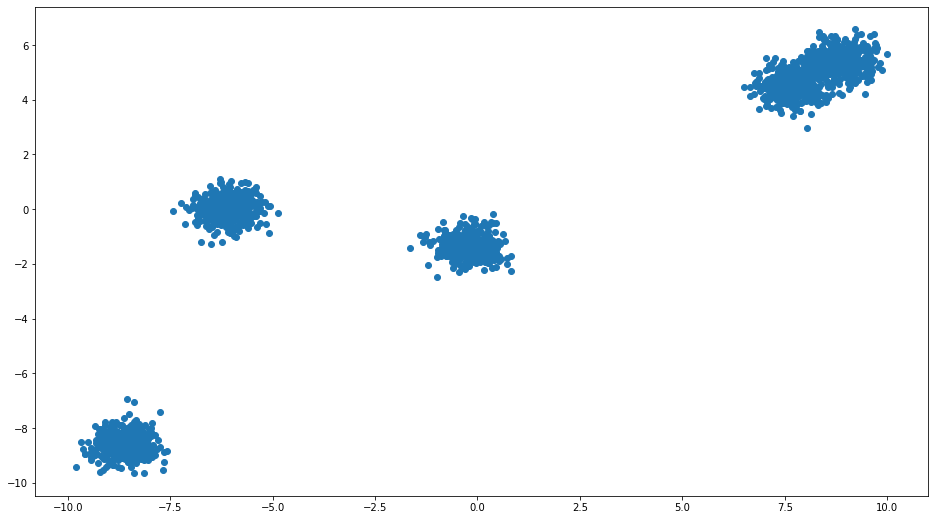

In [11]:
# Create a scatterplot of the first and second features
plt.scatter(features[:,0], features[:,1])

## K-means com scikitlearn

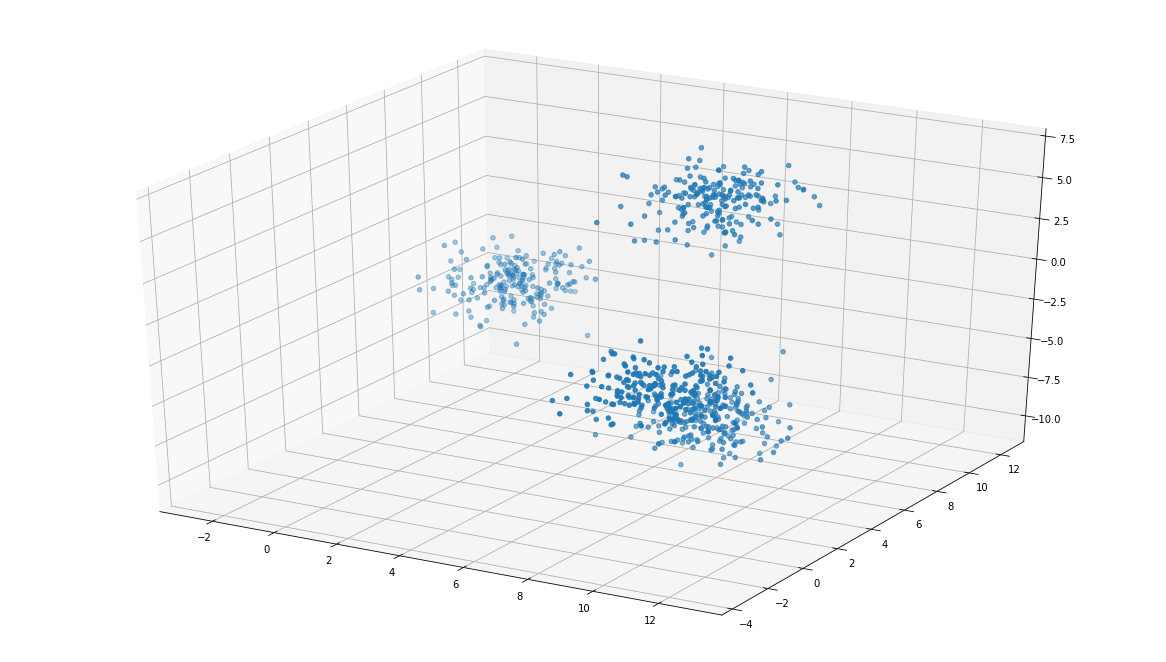

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

####################################################################################################################################



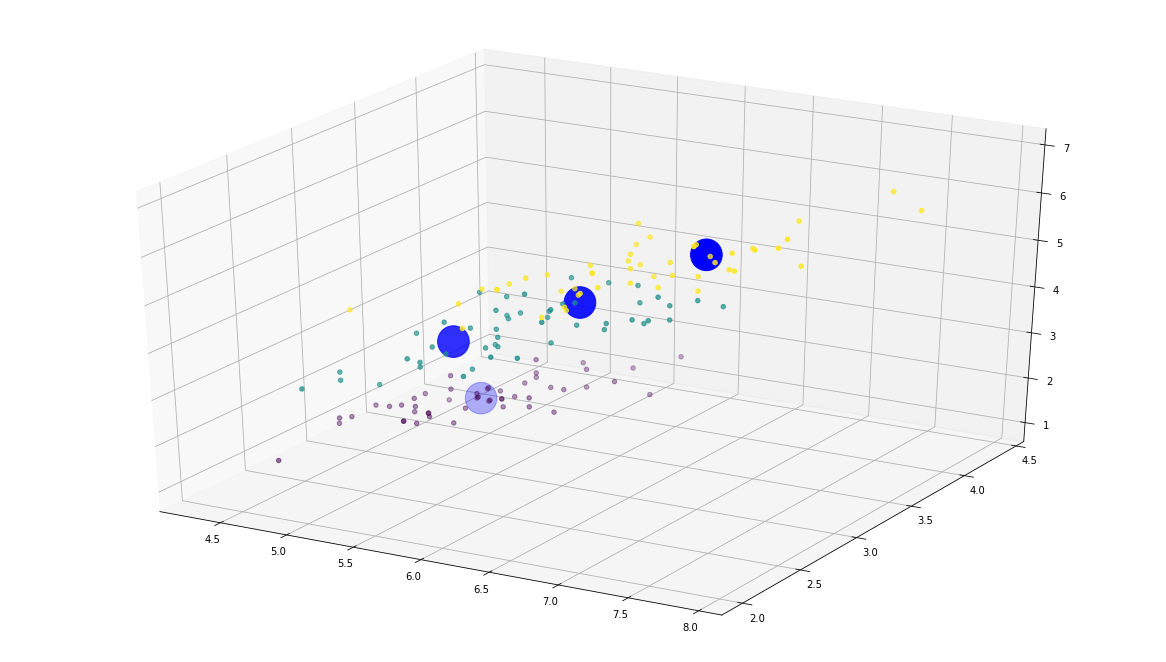

In [55]:
# Instanciamos KMeans
kmeans = KMeans(n_clusters=4)
# Treinamos os inputs
kmeans = kmeans.fit(X)
# Prevemos os cluters
labels = kmeans.predict(X)
# Obtemos os centróides
C = kmeans.cluster_centers_

# Plotamos
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='blue', s=1000)

## Elbow Method
Desafio do algoritmo está em descobrir o número correto de K. O método mais famoso é o "método do cotovelo".

![alt text](https://cdn-images-1.medium.com/max/1600/0*k27usELCoFFnztEr)


1.   Calcule a soma dos erros quadrados para alguns valores de K
2.   A soma dos quadrados dos erros é definido como o quadrado das distâncias entre cada membro e o seu centróide
3. Ao plotar K vs SOMA DOS ERROS QUADRADOS verá que o erro diminui à medida em que K aumenta, quando a SOMA DOS ERROS QUADRADOS cair abruptamente, gerando um "cotovelo", aquele será seu número K.


http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html



## PROJETO IRIS COM KMEANS

In [37]:
#LIBS
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [44]:
# DATASET
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [62]:
kmeans = KMeans(n_clusters=3)
# Treinamos os inputs
kmeans = kmeans.fit(X)

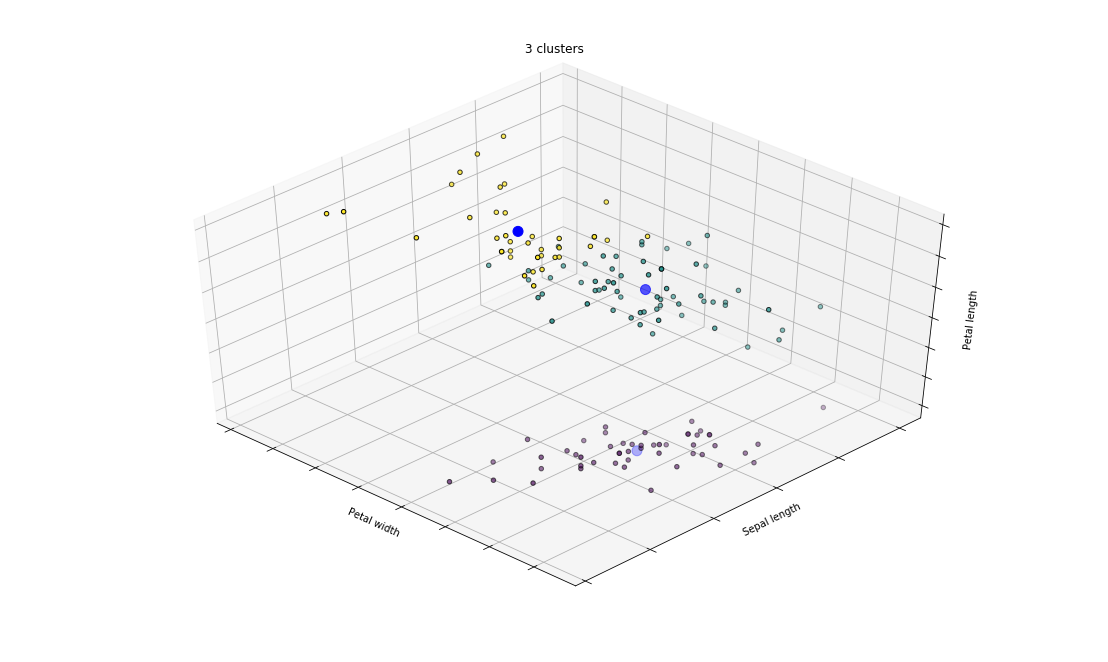

In [65]:
# TREINAMENTO + DATAVIZ
estimators = [('k_means_iris_3', KMeans(n_clusters=3))]

fignum = 1
titles = ['3 clusters']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(16, 9))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_
    C = kmeans.cluster_centers_
    ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='o', c='blue', s=100)
    ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=labels.astype(np.float), edgecolor='k')
    
    

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12

    fignum = fignum + 1

In [58]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.95      , 3.10666667, 5.86666667, 2.15333333],
       [6.25714286, 2.86190476, 4.85      , 1.63333333],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])